#### Stigmergy
####  Auto-catalytic behaviour
#### Variants
 * Ant Colony Systems
 * Max-Min AS 
 * Fast Ant Systems
 * CACO (node is a solution) local+global search
 * Multi pheromone/ multi colony
 

# Introduction

## Goal
The goal of this lab is to study two of the most famous discrete discrete optimization benchmark problems - the Traveling Salesman Problem (TSP) and the Knapsack problem.

Discrete optimization problems often present difficulties for naïve Evolutionary Computation approaches, where special care must be taken to generate and maintain feasible solutions and/or to sufficiently penalize infeasible solutions. Here we will see how Ant Colony Optimization can solve this kind of discrete problems much more efficiently than Evolutionary Computation approaches. In addition to that, we will study the effect of parametrization on the performance of Ant Colony Optimization.

Note that, unless otherwise specified, in this module's exercises the aim of the algorithms will be to maximize the fitness function $f(x)$, i.e. higher values correspond to a better fitness!

# Exercise 1

## Traveling Salesman Problem

In the Traveling Salesman Problem (TSP)$^{[1]}$, a salesperson is expected to make a round trip visiting a set of $N$ cities, returning the starting city. The goal is to minimize the total distance traveled. In the simplest version of the TSP, that we consider in this exercise, it is assumed that it is possible to travel from any city $i$ to any city $j$ (i.e., cities form a fully-connected graph), and the distance is the same both ways.
To specify a TSP instance, we need the spatial coordinates $(x, y)$ for each of the $N$ cities, and an adjacency matrix $(N × N)$ describing the pairwise distances between cities. These can be computed as Euclidean distances between cities, or in general can be specified according to a given distance function (which may take into account travel cost, time, and other factors). Candidate solutions for the TSP can be easily represented as permutations of the list of city indices (enumerating the order in which cities should be visited). For instance, if there are $5$ cities, then a candidate solution might be $[4, 1, 0, 2, 3]$ (assuming zero-indexing).

In case of Evolutionary Computation approaches, a simple sequence representation can be used, coupled with mechanisms that ensure that the candidate solutions remain feasible during crossover and mutation. This can be accomplished by ad hoc genetic operators (which in the inspyred framework are dubbed as "variators"), namely the partially matched crossover and the inversion mutation, as shown in the next cell. As an alternative, we can use Ant Colony Optimization that is naturally suited for solving graph-like problems such as the TSP and, differently from Evolutionary Computation approaches, does not require any specific operator. To start the experiments run the next cell$^{[2]}$.

**The code will perform a single run of Ant Colony Systems (ACS) and a customized Evolutionary Algorithm (EA)** and show you the fitness trends of both algorithms, as well as a map corresponding to the best solutions provided by the two algorithms. Note that for both algorithms the fitness function is defined as the reciprocal of the total distance traveled ($f(x) = \frac{1}{\sum{d}}$), to be **maximized**, such that maximizing $f(x)$ corresponds to minimizing the total distance.

Execute the following cell on different problem instances (this can be obtained by changing the variable "instance" in the next cell) and observe the behavior of the two algorithms on each instance. Note that the run time can be quite long (several seconds)
on larger instances (especially on *att48*). 

- **Which algorithm provides the best solution in most cases?**
- **What can you say about the number of function evaluations needed to converge?**

---
[1]: See https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html

[2]: For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results.

[3]: Note that you can also create your own instances by editing the two variables "points" (that contains a set of coordinates
$(x, y)$) and "distances" (that contains an adjacency matrix that can be computed e.g. by Euclidean distances between points).

datasets taken from:
* https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html
* http://elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/index.html

In [2]:
seed = 238842

In [99]:
import pandas as pd
from utils.utils_07.exercise_1 import *
from utils.utils_07.plot_utils import *
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import rotate_axes

In [5]:
instance = "p01" # "att48" #bays29
points = readFileAsMatrix("utils/utils_07/datasets/tsp/" + instance + "_xy.txt")
distances = readFileAsMatrix("utils/utils_07/datasets/tsp/" + instance + "_d.txt")

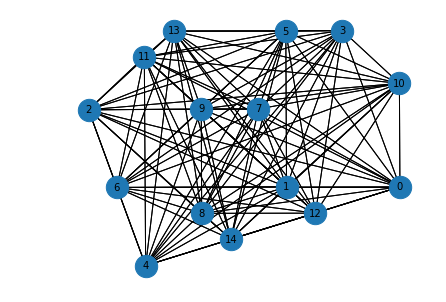

In [10]:
#This is a visualization of the "Fully connected" TSP data

# Create an empty graph
G = nx.Graph()

# Add the points as nodes to the graph
for i, point in enumerate(points):
    G.add_node(i, pos=point)

# Add edges between all pairs of nodes
for i in range(len(points)):
    for j in range(i+1, len(points)):
        G.add_edge(i, j)

# Get the positions of the nodes for plotting
pos = nx.get_node_attributes(G, 'pos')

# Draw the graph with nodes and edges
nx.draw(G, pos, with_labels=True, node_size=500, font_size=10)
nx.draw_networkx_edges(G, pos, width=1)

# Set the plot limits
plt.xlim(-100, 10)
plt.ylim(-30, 50)

# Show the plot
plt.show()

In [7]:
distances = pd.DataFrame(distances)
distances

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.0,29.0,82.0,46.0,68.0,52.0,72.0,42.0,51.0,55.0,29.0,74.0,23.0,72.0,46.0
1,29.0,0.0,55.0,46.0,42.0,43.0,43.0,23.0,23.0,31.0,41.0,51.0,11.0,52.0,21.0
2,82.0,55.0,0.0,68.0,46.0,55.0,23.0,43.0,41.0,29.0,79.0,21.0,64.0,31.0,51.0
3,46.0,46.0,68.0,0.0,82.0,15.0,72.0,31.0,62.0,42.0,21.0,51.0,51.0,43.0,64.0
4,68.0,42.0,46.0,82.0,0.0,74.0,23.0,52.0,21.0,46.0,82.0,58.0,46.0,65.0,23.0
5,52.0,43.0,55.0,15.0,74.0,0.0,61.0,23.0,55.0,31.0,33.0,37.0,51.0,29.0,59.0
6,72.0,43.0,23.0,72.0,23.0,61.0,0.0,42.0,23.0,31.0,77.0,37.0,51.0,46.0,33.0
7,42.0,23.0,43.0,31.0,52.0,23.0,42.0,0.0,33.0,15.0,37.0,33.0,33.0,31.0,37.0
8,51.0,23.0,41.0,62.0,21.0,55.0,23.0,33.0,0.0,29.0,62.0,46.0,29.0,51.0,11.0
9,55.0,31.0,29.0,42.0,46.0,31.0,31.0,15.0,29.0,0.0,51.0,21.0,41.0,23.0,37.0


<ipython-input-13-c1a31c3b9b9e>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('coolwarm')


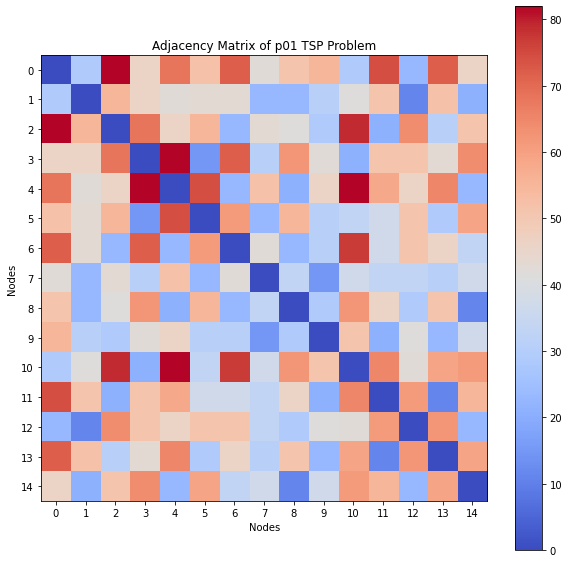

In [13]:
distances = pd.DataFrame(distances)
data = distances.values
# Set the range of values to map to colors
vmin = data.min()
vmax = data.max()

# Create a color map with blue-to-red color scheme
cmap = plt.cm.get_cmap('coolwarm')


# Plot the data as a color map
plt.figure(figsize=(10,10))
plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)

# Add a color bar to the plot
colorbar = plt.colorbar()

# Set the tick labels to the column names
plt.xticks(range(len(distances.columns)), distances.columns)
plt.yticks(range(len(distances)), distances.index)

# Add a title and axis labels
plt.title("Adjacency Matrix of p01 TSP Problem")
plt.xlabel("Nodes")
plt.ylabel("Nodes")

# Show the plot
plt.show()

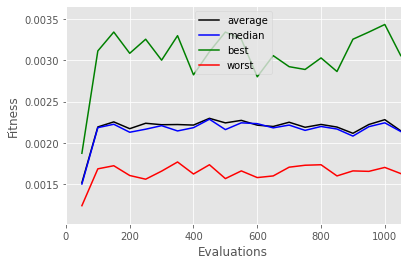

In [79]:
# common parameters
pop_size = 50
max_generations = 20
seed = 0
prng = Random(seed)
display = True
# ACS specific parameters
evaporation_rate = 0.1
learning_rate = 0.1
# EA specific parameters
tournament_size = 5
num_elites = 1

args = {}
args["fig_title"] = "ACS"

# run ACS
problem = inspyred.benchmarks.TSP(distances)
ac = inspyred.swarm.ACS(prng, problem.components)
ac.observer = [plot_observer]
ac.terminator = inspyred.ec.terminators.generation_termination
final_pop = ac.evolve(generator=problem.constructor, 
                      evaluator=problem.evaluator, 
                      bounder=problem.bounder,
                      maximize=problem.maximize, 
                      pop_size=pop_size,
                      max_generations=max_generations,
                      evaporation_rate=evaporation_rate,
                      learning_rate=learning_rate,**args)
best_ACS = max(ac.archive)


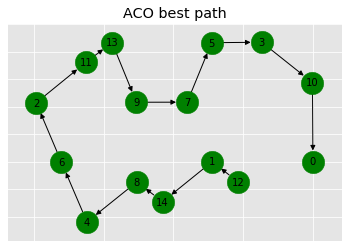

In [78]:
# Edges
edges = [(12, 1), (1, 14), (14, 8), (8, 4), (4, 6), (6, 2), (2, 11),
         (11, 13), (13, 9), (9, 7), (7, 5), (5, 3), (3, 10), (10, 0)]


# Create a directed graph
G = nx.DiGraph()

# Add nodes with positions to the graph
for i, position in enumerate(points):
    G.add_node(i, pos=position)

# Add edges to the directed graph
G.add_edges_from(edges)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10, arrows=True,node_color='green')

# Show the plot
plt.title("ACO best path")
plt.show()

In [54]:
# Let's see how does the performance vary changing the number of ants and the max generation 

display = False
pop_size = list(range(10, 210, 10))
max_generations = list(range(10, 110, 10))

seed = 238842
prng = Random(seed)

# run ACS
bests_ants = []
for i in pop_size:
    for j in max_generations: 
        problem = inspyred.benchmarks.TSP(distances)
        ac = inspyred.swarm.ACS(prng, problem.components)
        #ac.observer = [plot_observer]
        ac.terminator = inspyred.ec.terminators.generation_termination
        final_pop = ac.evolve(generator=problem.constructor, 
                              evaluator=problem.evaluator, 
                              bounder=problem.bounder,
                              maximize=problem.maximize, 
                              pop_size=i,
                              max_generations=max_j,
                              evaporation_rate=evaporation_rate,
                              learning_rate=learning_rate,**args)
        best_ACS = max(ac.archive)
        bests_ants.append(best_ACS)

In [66]:
bests_ants_fitness = []
for i in range(len(bests_ants)):
    bests_ants_fitness.append(bests_ants[i].fitness)
    
fitness_dict = {}
count = 0
for i in pop_size:
    for j in max_generations:
        count += 1
        fitness_dict[(i, j)] = bests_ants_fitness[count-1]

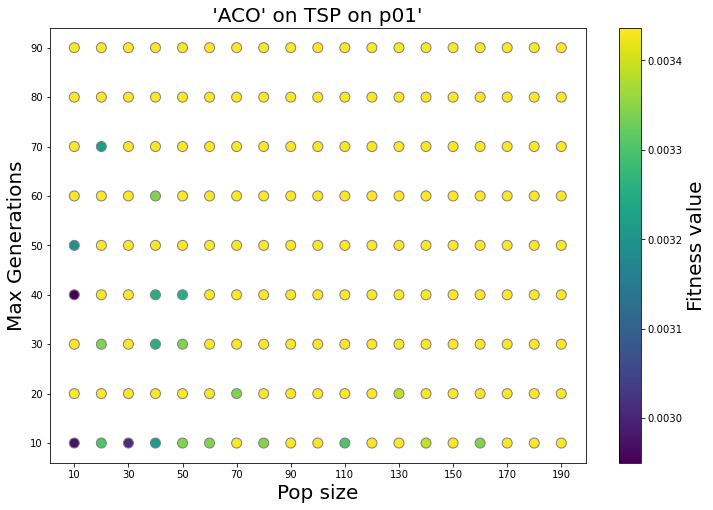

In [143]:
plt.figure(figsize=(12, 8))

x = [key[0] for key in fitness_dict.keys()]
y = [key[1] for key in fitness_dict.keys()]
z = list(fitness_dict.values())

plt.scatter(x, y, c=z, cmap='viridis', s = 100, edgecolor = "gray")


cbar = plt.colorbar(label='Fitness value')
cbar.ax.set_ylabel('Fitness value', fontdict={'fontsize': 20})


plt.title(" 'ACO' on TSP on p01' ",fontsize= 20)
plt.xlabel('Pop size', fontsize= 20)
plt.xticks(range(10, 220, 20))
plt.ylabel('Max Generations', fontsize= 20)
plt.yticks(range(10, 110, 10))

plt.show()

In [82]:
#Let's analyze the effect of the avaporation rate

display = False
pop_size = 10
max_generations = 20
evaporation_rates = np.arange(0.0, 1.01, 0.01)
seed = 238842
prng = Random(seed)


# run ACS
bests_ants_10_20 = []
for i in evaporation_rates: 
    problem = inspyred.benchmarks.TSP(distances)
    ac = inspyred.swarm.ACS(prng, problem.components)
    #ac.observer = [plot_observer]
    ac.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ac.evolve(generator=problem.constructor, 
                          evaluator=problem.evaluator, 
                          bounder=problem.bounder,
                          maximize=problem.maximize, 
                          pop_size= pop_size,
                          max_generations= max_generations ,
                          evaporation_rate=i,
                          learning_rate=learning_rate,**args)
    best_ACS = max(ac.archive)
    bests_ants_10_20.append(best_ACS)

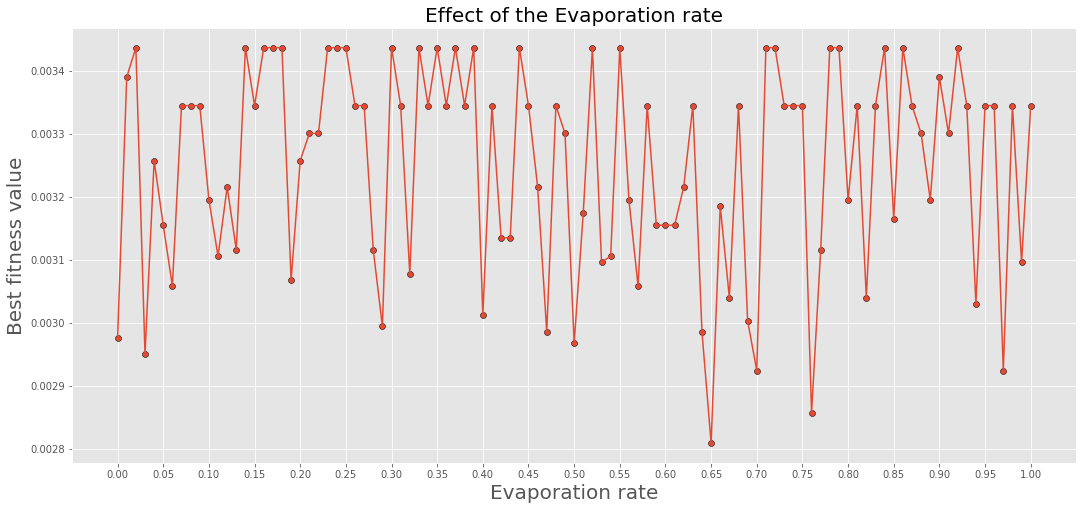

In [92]:
plt.figure(figsize=(18, 8))

bests_ants_fitness_10_20 = []
for i in range(len(bests_ants_10_20)):
    bests_ants_fitness_10_20.append(bests_ants_10_20[i].fitness)

    
plt.plot(evaporation_rates, bests_ants_fitness_10_20)
plt.scatter(evaporation_rates, bests_ants_fitness_10_20, edgecolor ="black")
plt.xticks(np.arange(0.0, 1.01, 0.05))
plt.title("Effect of the Evaporation rate",fontsize = 20)
plt.xlabel("Evaporation rate", fontsize = 20)
plt.ylabel("Best fitness value", fontsize = 20)
#plt.axhline(y=max(z), linestyle='dotted', color='red', label = "max previous fitness value ")
#plt.legend(loc="best", fontsize="large")

plt.show()

After this analysis on the ACO, let's compare its behaviour withe the EA

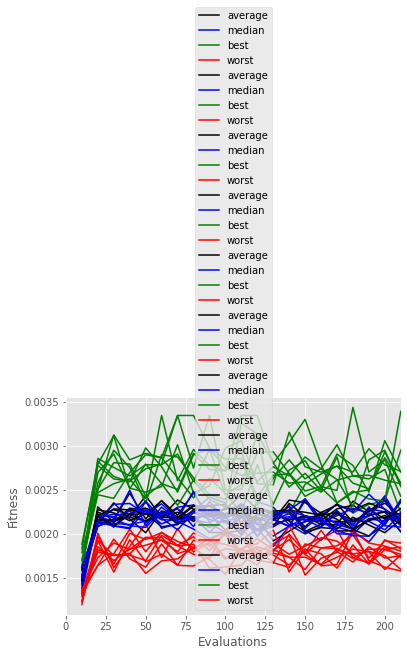

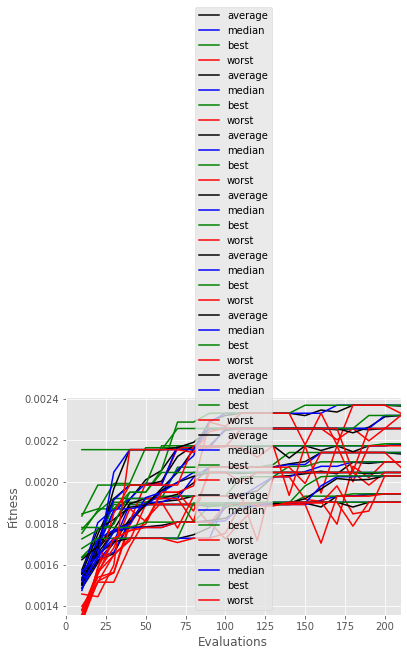

In [100]:
# common parameters
pop_size = 10
max_generations = 20
seed = 238842
prng = Random(seed)
display = False

# ACS specific parameters
evaporation_rate = 0.25
learning_rate = 0.1

# EA specific parameters
tournament_size = 5
num_elites = 1

args = {}

args["fig_title"] = "ACS"
# run ACS
ACS_evaluations = []
for _ in range(10):
    problem = inspyred.benchmarks.TSP(distances)
    ac = inspyred.swarm.ACS(prng, problem.components)
    ac.observer = [plot_observer]
    ac.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ac.evolve(generator=problem.constructor, 
                          evaluator=problem.evaluator, 
                          bounder=problem.bounder,
                          maximize=problem.maximize, 
                          pop_size=pop_size,
                          max_generations=max_generations,
                          evaporation_rate=evaporation_rate,
                          learning_rate=learning_rate,**args)
    best_ACS = max(ac.archive)
    ACS_evaluations.append(best_ACS.fitness)
    




args["fig_title"] = "EA"
# run EA
EA_evaluations = []
for _ in range(10):
    problem = inspyred.benchmarks.TSP(distances)
    ea = inspyred.ec.EvolutionaryComputation(prng)
    ea.observer = [plot_observer]
    ea.selector = inspyred.ec.selectors.tournament_selection
    ea.variator = [inspyred.ec.variators.partially_matched_crossover,
                   inspyred.ec.variators.inversion_mutation]
    ea.replacer = inspyred.ec.replacers.generational_replacement
    ea.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ea.evolve(generator=problem.generator,
                          evaluator=problem.evaluator,
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          pop_size=pop_size,
                          max_generations=max_generations,
                          num_selected=pop_size,
                          tournament_size=tournament_size,
                          num_elites=num_elites,**args)
    best_EA = max(ea.population)
    EA_evaluations.append(best_EA.fitness)




if display:
    indices = []
    for link in best_ACS.candidate:
        # each point is ((i, j), 1/distance_ij)
        indices.append(link.element[0])
    indices.append(best_ACS.candidate[-1].element[1])
    solution_ACS = indices

    solution_EA = best_EA.candidate

    print("\n\nBest Solution ACS: {0} - Distance: {1}".format(str(solution_ACS), 1/best_ACS.fitness))
    print("Best Solution EA : {0} - Distance: {1}".format(str(solution_EA), 1/best_EA.fitness))

    plotSolution(points, distances, solution_ACS, "ACS (best solution)")
    plotSolution(points, distances, solution_EA, "EA (best solution)")
    plt.legend().remove()

    ioff()
    show()



Best Solution ACS: [10, 3, 5, 7, 9, 11, 13, 2, 6, 4, 8, 14, 1, 12, 0] - Distance: 299.0
Best Solution EA : [4, 6, 2, 1, 12, 0, 7, 9, 5, 13, 11, 3, 10, 8, 14] - Distance: 431.0


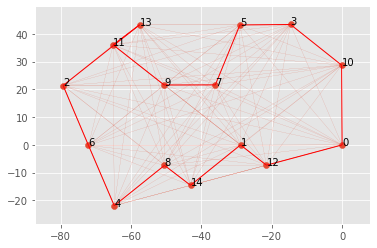

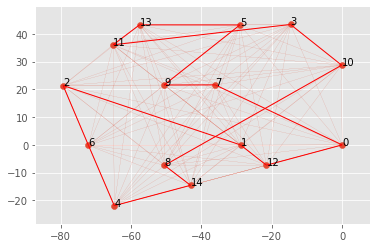

In [96]:
    indices = []
    for link in best_ACS.candidate:
        # each point is ((i, j), 1/distance_ij)
        indices.append(link.element[0])
    indices.append(best_ACS.candidate[-1].element[1])
    solution_ACS = indices

    solution_EA = best_EA.candidate

    print("\n\nBest Solution ACS: {0} - Distance: {1}".format(str(solution_ACS), 1/best_ACS.fitness))
    print("Best Solution EA : {0} - Distance: {1}".format(str(solution_EA), 1/best_EA.fitness))

    plotSolution(points, distances, solution_ACS, "ACS (best solution)")
    plotSolution(points, distances, solution_EA, "EA (best solution)")

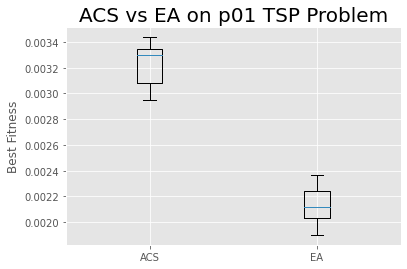

In [94]:
# create boxplot
fig, ax = plt.subplots()
ax.boxplot([ACS_evaluations, EA_evaluations])

ax.set_xticklabels(['ACS', 'EA'])
ax.set_ylabel('Best Fitness')
plt.title("ACS vs EA on p01 TSP Problem", fontsize=20)
plt.show()

# Exercise 2
## Knapsack problem 
In the Knapsack problem$^{[1]}$, we are given a knapsack of fixed capacity $C$. We are also given a list of $N$ items, each having a weight $w$ and a value $v$. We can put any subset of the items into the knapsack, as long as the total weight of the selected items does not exceed $C$. In the most general formulation of the problem, it is possible to select the same item multiple times. We aim to maximize the total value of the selection, which is the sum of the values of each item we put into the knapsack. Thus, a solution of the Knapsack problem is a subset $S$ of the $N$ items, each considered a certain number of times, for which the total weight is less than or equal to $C$, and which maximizes the total value. If the same item can be selected multiple times, the problem is called *Knapsack with duplicates*, otherwise if any item can be selected only once, the problem is called *0/1 Knapsack*.

Candidate solutions for the Knapsack problem can be represented as either a binary list (for the *0/1 Knapsack*) or as a list of non-negative integers (for the Knapsack with duplicates). In each case, the length of the list is the same as the number of items, and each element of the list corresponds to the quantity of the corresponding item to place in the knapsack. In case of Evolutionary Computation approaches, we can use as genetic operators uniform crossover and Gaussian mutation, as shown in the next cell. The reason we can use Gaussian mutation, even though the candidates are composed of discrete values, is because the bounder created by the Knapsack benchmark is an instance of $DiscreteBounder$, which automatically moves an illegal component to its nearest legal value (an integer, in this case). Once again, as an alternative we can use Ant Colony Optimization.
In this exercise, we will focus on the *0/1 Knapsack problem* (this is obtained by setting duplicates=False in next cell). To start the experiments, you need to run the next cell. The script will perform a single run of Ant Colony Systems (ACS) and a customized Evolutionary Algorithm (EA) and show you the fitness trends of both algorithms.

Execute the script on different problem instances (this can be obtained by changing the variable "instance" in the next cell) and observe the behavior of the two algorithms on each instance$^{[2]}$. Note that the run time can be quite long (several seconds) on larger instances. 

- **Which algorithm provides the best solution in most cases?**
- **What can you say about the number of function evaluations needed to converge?**

---
[1]: See https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html

[2]: Note that you can also create your own instances by editing the two variables "items" (a set of pairs $<w, v>$)
and "capacity". Both variables must be expressed as integer values.


* P01 is a set of 10 weights and profits for a knapsack of capacity 165.
* P02 is a set of 5 weights and profits for a knapsack of capacity 26.
* P03 is a set of 6 weights and profits for a knapsack of capacity 190.
* P04 is a set of 7 weights and profits for a knapsack of capacity 50.
* P05 is a set of 8 weights and profits for a knapsack of capacity 104.
* P06 is a set of 7 weights and profits for a knapsack of capacity 170. 
* P07 is a set of 15 weights and profits for a knapsack of capacity 750, with an optimal profit of 1458.
* P08 is a set of 24 weights and profits for a knapsack of capacity 6404180, with an optimal profit of 13549094.

INSTANCE 01
Items:
 [(23, 92), (31, 57), (29, 49), (44, 68), (53, 60), (38, 43), (63, 67), (85, 84), (89, 87), (82, 72)]
Capacity:
 165
Best Solution ACS: [1, 1, 1, 1, 0, 1, 0, 0, 0, 0] - Value: 309
Best Solution EA : [1, 1, 0, 1, 0, 0, 1, 0, 0, 0] - Value: 284


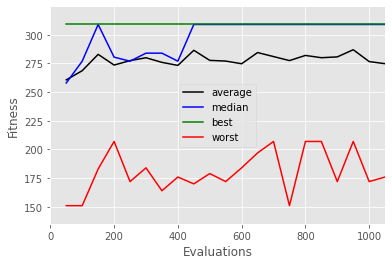

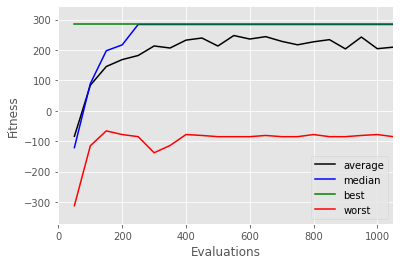

INSTANCE 02
Items:
 [(12, 24), (7, 13), (11, 23), (8, 15), (9, 16)]
Capacity:
 26
Best Solution ACS: [0, 1, 1, 1, 0] - Value: 51
Best Solution EA : [0, 1, 1, 1, 0] - Value: 51


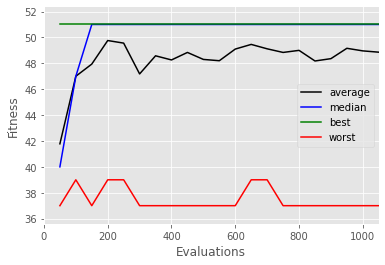

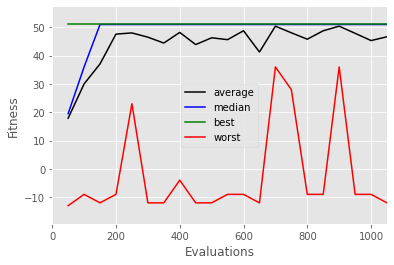

INSTANCE 03
Items:
 [(56, 50), (59, 50), (80, 64), (64, 46), (75, 50), (17, 5)]
Capacity:
 190
Best Solution ACS: [1, 1, 0, 0, 1, 0] - Value: 150
Best Solution EA : [1, 1, 0, 0, 1, 0] - Value: 150


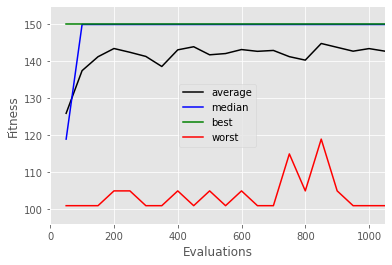

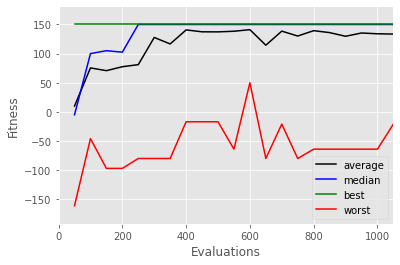

INSTANCE 04
Items:
 [(31, 70), (10, 20), (20, 39), (19, 37), (4, 7), (3, 5), (6, 10)]
Capacity:
 50
Best Solution ACS: [1, 0, 0, 1, 0, 0, 0] - Value: 107
Best Solution EA : [1, 1, 0, 0, 0, 1, 1] - Value: 105


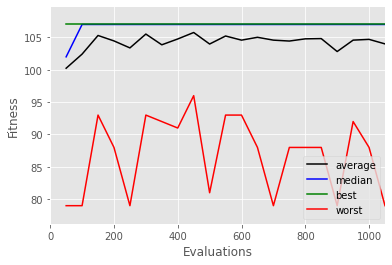

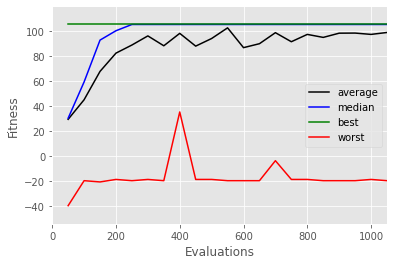

INSTANCE 05
Items:
 [(25, 350), (35, 400), (45, 450), (5, 20), (25, 70), (3, 8), (2, 5), (2, 5)]
Capacity:
 104
Best Solution ACS: [0, 1, 1, 1, 0, 1, 1, 0] - Value: 883
Best Solution EA : [1, 0, 1, 1, 1, 0, 1, 1] - Value: 900


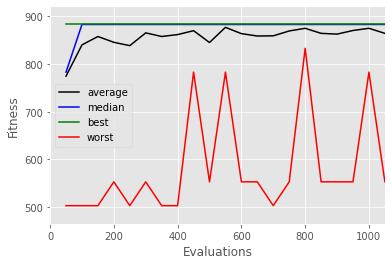

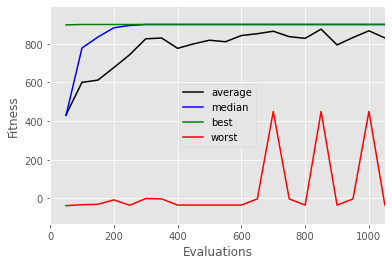

INSTANCE 06
Items:
 [(41, 442), (50, 525), (49, 511), (59, 593), (55, 546), (57, 564), (60, 617)]
Capacity:
 170
Best Solution ACS: [0, 1, 0, 1, 0, 0, 1] - Value: 1735
Best Solution EA : [0, 1, 0, 1, 0, 0, 1] - Value: 1735


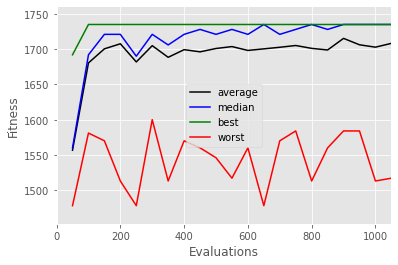

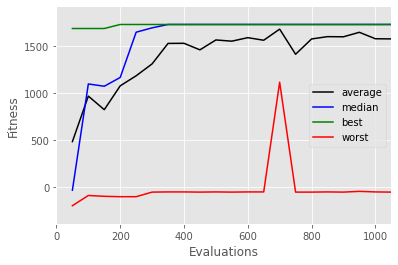

INSTANCE 07
Items:
 [(70, 135), (73, 139), (77, 149), (80, 150), (82, 156), (87, 163), (90, 173), (94, 184), (98, 192), (106, 201), (110, 210), (113, 214), (115, 221), (118, 229), (120, 240)]
Capacity:
 750
Best Solution ACS: [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1] - Value: 1453
Best Solution EA : [1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0] - Value: 1441


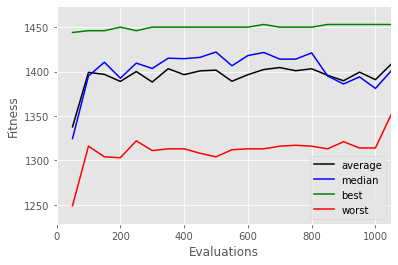

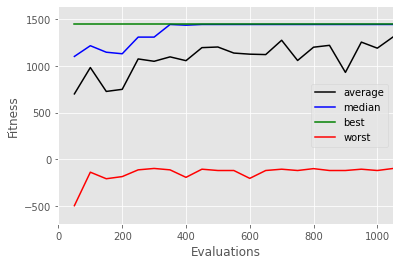

INSTANCE 08
Items:
 [(382745, 825594), (799601, 1677009), (909247, 1676628), (729069, 1523970), (467902, 943972), (44328, 97426), (34610, 69666), (698150, 1296457), (823460, 1679693), (903959, 1902996), (853665, 1844992), (551830, 1049289), (610856, 1252836), (670702, 1319836), (488960, 953277), (951111, 2067538), (323046, 675367), (446298, 853655), (931161, 1826027), (31385, 65731), (496951, 901489), (264724, 577243), (224916, 466257), (169684, 369261)]
Capacity:
 6404180
Best Solution ACS: [1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0] - Value: 13524340
Best Solution EA : [1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0] - Value: 13295368


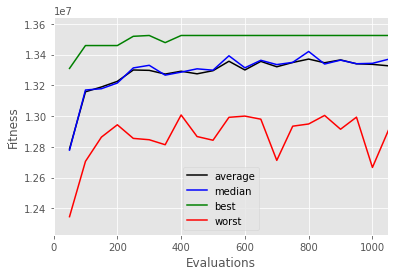

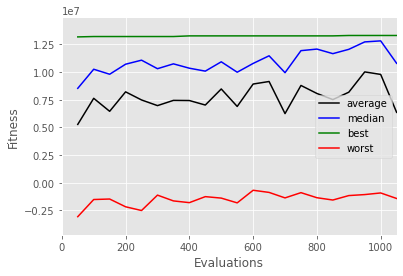

In [108]:
from utils.utils_07.exercise_2 import *
from utils.utils_07.plot_utils import *

"""
items = [(7,369), (10,346), (11,322), (10,347), (12,348), (13,383),
         (8,347), (11,364), (8,340), (8,324), (13,365), (12,314), 
         (13,306), (13,394), (7,326), (11,310), (9,400), (13,339), 
         (5,381), (14,353), (6,383), (9,317), (6,349), (11,396), 
         (14,353), (9,322), (5,329), (5,386), (5,382), (4,369), 
         (6,304), (10,392), (8,390), (8,307), (10,318), (13,359), 
         (9,378), (8,376), (11,330), (9,331)]
capacity = 15
"""

# datasets taken from https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html

instances = ["01", "02", "03", "04", "05", "06", "07", "08"]

for instance in instances:
    print("INSTANCE {}".format(instance))
    capacity = readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_c.txt")[0]
    weights =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_w.txt")
    values =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_p.txt")
    items = [(w,v) for w, v in zip(weights, values)]

    print("Items:\n", items)
    print("Capacity:\n", capacity)

    # common parameters
    pop_size = 50
    max_generations = 20
    duplicates = False
    seed = 0
    prng = Random(seed)
    display = True
    # ACS specific parameters
    evaporation_rate = 0.1
    learning_rate = 0.1
    # EA specific parameters
    tournament_size = 5
    num_elites = 1

    args = {}
    args["fig_title"] = "ACS"

    # run ACS
    problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
    ac = inspyred.swarm.ACS(prng, problem.components)
    ac.observer = [plot_observer]
    ac.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ac.evolve(generator=problem.constructor,
                          evaluator=problem.evaluator,
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          pop_size=pop_size,
                          max_generations=max_generations,
                          evaporation_rate=evaporation_rate,
                          learning_rate=learning_rate,**args)
    best_ACS = max(ac.archive)

    args["fig_title"] = "EA"

    # run EA
    problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
    ea = inspyred.ec.EvolutionaryComputation(prng)
    ea.observer = [plot_observer]
    ea.selector = inspyred.ec.selectors.tournament_selection
    ea.variator = [inspyred.ec.variators.uniform_crossover,
                   inspyred.ec.variators.gaussian_mutation]
    ea.replacer = inspyred.ec.replacers.generational_replacement
    ea.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ea.evolve(generator=problem.generator,
                          evaluator=problem.evaluator,
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          pop_size=pop_size,
                          max_generations=max_generations,
                          num_selected=pop_size,
                          tournament_size=tournament_size,
                          num_elites=num_elites,**args)
    best_EA = max(ea.population)

    if display:
        indices = []
        for item in best_ACS.candidate:
            # each item is (element, value)
            index = items.index((item.element, item.value))
            indices.append(index)
        solution_ACS = np.zeros(len(items),dtype=np.uint16)
        for i in indices:
            solution_ACS[i] += 1
        solution_ACS = solution_ACS.tolist()

        solution_EA = best_EA.candidate

        print("Best Solution ACS: {0} - Value: {1}".format(str(solution_ACS), best_ACS.fitness))
        print("Best Solution EA : {0} - Value: {1}".format(str(solution_EA), best_EA.fitness))

        ioff()
        show()

# Exercise 3

In this exercise we will focus on the *Knapsack with duplicates* (this is obtained by setting duplicates=True in the next cell). To start the experiments, you need to run the next cell. Once again, the script will perform a single run of Ant Colony Systems (ACS) and a customized Evolutionary Algorithm (EA) and show you the fitness trends of both algorithms.

Execute the script on different problem instances (this can be obtained by changing the variable "instance" in the next cell) and observe the behavior of the two algorithms on each instance$^{[1]}$. Note that the run time can be quite long (several seconds) on larger instances.

- **Which algorithm provides the best solution in most cases?**
- **What can you say about the number of function evaluations needed to converge?**
- **Do you observe any difference on the algorithmic behavior between this exercise and the previous one?**

---
[1]: Also in this case you can also create your own instances by editing the two variables "items" and "capacity".

INSTANCE: 01
Items:
 [(23, 92), (31, 57), (29, 49), (44, 68), (53, 60), (38, 43), (63, 67), (85, 84), (89, 87), (82, 72)]
Capacity:
 165
Best Solution ACS: [7, 0, 0, 0, 0, 0, 0, 0, 0, 0] - Value: 644
Best Solution EA : [4, 0, 2, 0, 0, 0, 0, 0, 0, 0] - Value: 466


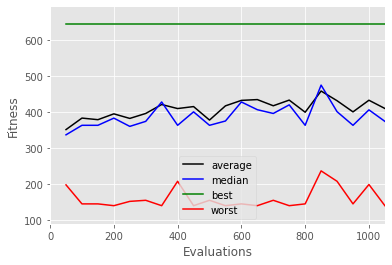

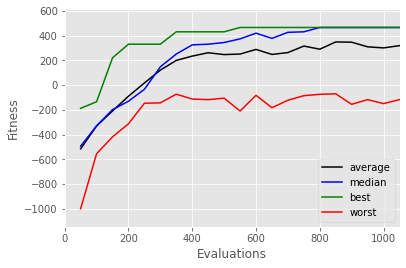

INSTANCE: 02
Items:
 [(12, 24), (7, 13), (11, 23), (8, 15), (9, 16)]
Capacity:
 26
Best Solution ACS: [0, 1, 1, 1, 0] - Value: 51
Best Solution EA : [1, 2, 0, 0, 0] - Value: 50


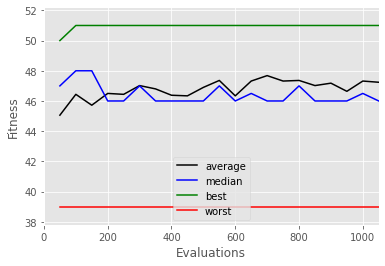

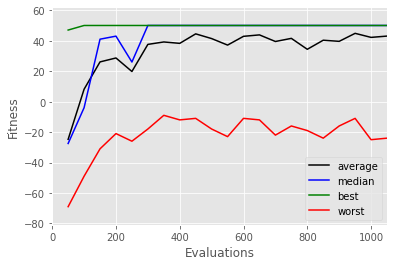

INSTANCE: 03
Items:
 [(56, 50), (59, 50), (80, 64), (64, 46), (75, 50), (17, 5)]
Capacity:
 190
Best Solution ACS: [2, 1, 0, 0, 0, 1] - Value: 155
Best Solution EA : [0, 1, 1, 0, 0, 3] - Value: 129


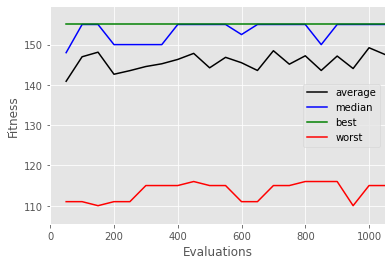

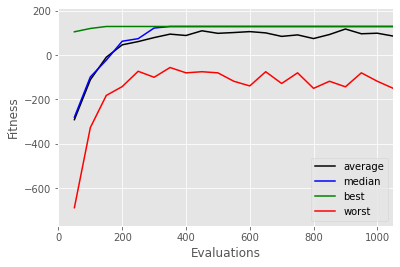

INSTANCE: 04
Items:
 [(31, 70), (10, 20), (20, 39), (19, 37), (4, 7), (3, 5), (6, 10)]
Capacity:
 50
Best Solution ACS: [1, 0, 0, 1, 0, 0, 0] - Value: 107
Best Solution EA : [0, 4, 0, 0, 1, 0, 1] - Value: 97


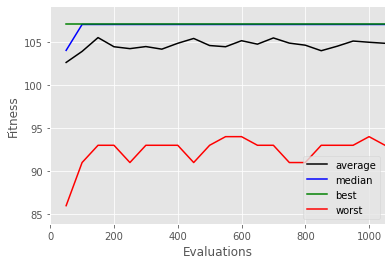

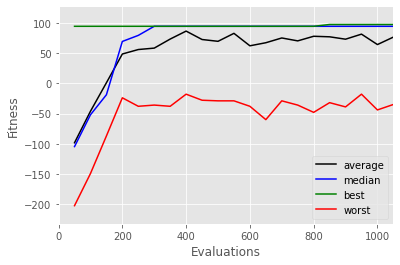

INSTANCE: 05
Items:
 [(25, 350), (35, 400), (45, 450), (5, 20), (25, 70), (3, 8), (2, 5), (2, 5)]
Capacity:
 104
Best Solution ACS: [4, 0, 0, 0, 0, 0, 2, 0] - Value: 1410
Best Solution EA : [1, 0, 0, 3, 1, 11, 1, 2] - Value: 583


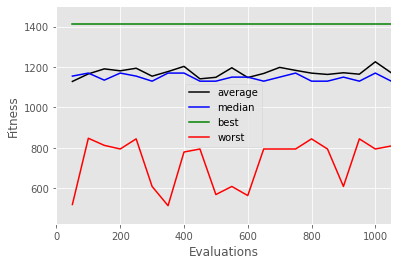

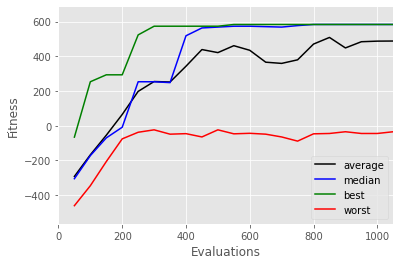

INSTANCE: 06
Items:
 [(41, 442), (50, 525), (49, 511), (59, 593), (55, 546), (57, 564), (60, 617)]
Capacity:
 170
Best Solution ACS: [4, 0, 0, 0, 0, 0, 0] - Value: 1768
Best Solution EA : [0, 1, 0, 0, 0, 0, 2] - Value: 1759


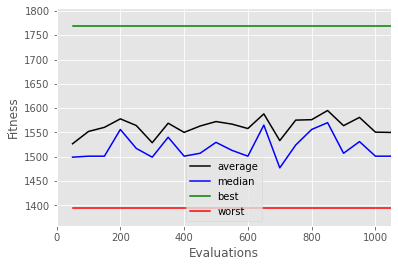

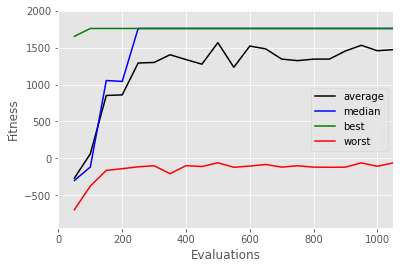

INSTANCE: 07
Items:
 [(70, 135), (73, 139), (77, 149), (80, 150), (82, 156), (87, 163), (90, 173), (94, 184), (98, 192), (106, 201), (110, 210), (113, 214), (115, 221), (118, 229), (120, 240)]
Capacity:
 750
Best Solution ACS: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5] - Value: 1488
Best Solution EA : [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0] - Value: 1441


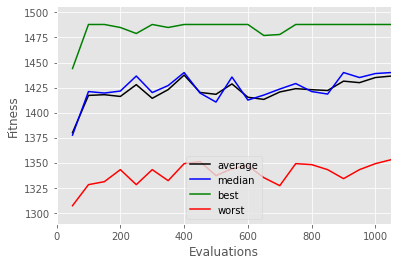

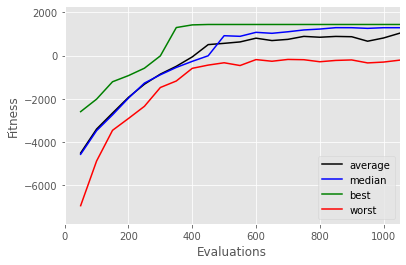

INSTANCE: 08
Items:
 [(382745, 825594), (799601, 1677009), (909247, 1676628), (729069, 1523970), (467902, 943972), (44328, 97426), (34610, 69666), (698150, 1296457), (823460, 1679693), (903959, 1902996), (853665, 1844992), (551830, 1049289), (610856, 1252836), (670702, 1319836), (488960, 953277), (951111, 2067538), (323046, 675367), (446298, 853655), (931161, 1826027), (31385, 65731), (496951, 901489), (264724, 577243), (224916, 466257), (169684, 369261)]
Capacity:
 6404180
Best Solution ACS: [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 3, 0, 0, 0, 3] - Value: 13905056
Best Solution EA : [0, 0, 0, 0, 0, 20, 60, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 7, 0, 2, 10, 3] - Value: -737037


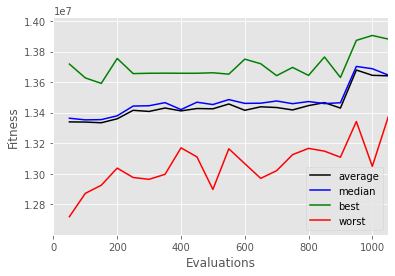

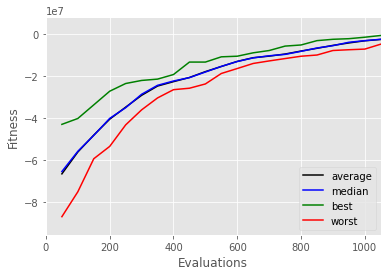

In [110]:
from utils.utils_07.exercise_3 import *
from utils.utils_07.plot_utils import *

"""
items = [(7,369), (10,346), (11,322), (10,347), (12,348), (13,383),
         (8,347), (11,364), (8,340), (8,324), (13,365), (12,314), 
         (13,306), (13,394), (7,326), (11,310), (9,400), (13,339), 
         (5,381), (14,353), (6,383), (9,317), (6,349), (11,396), 
         (14,353), (9,322), (5,329), (5,386), (5,382), (4,369), 
         (6,304), (10,392), (8,390), (8,307), (10,318), (13,359), 
         (9,378), (8,376), (11,330), (9,331)]
capacity = 15
"""

# datasets taken from https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html


instances = ["01", "02", "03", "04", "05", "06", "07", "08"]

for instance in instances:
    print("INSTANCE: {}".format(instance))
    capacity = readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_c.txt")[0]
    weights =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_w.txt")
    values =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_p.txt")
    items = [(w,v) for w, v in zip(weights, values)]

    print("Items:\n", items)
    print("Capacity:\n", capacity)

    # common parameters
    pop_size = 50
    max_generations = 20
    duplicates = True
    seed = 238842
    prng = Random(seed)
    display = True
    # ACS specific parameters
    evaporation_rate = 0.1
    learning_rate = 0.1
    # EA specific parameters
    tournament_size = 5
    num_elites = 1

    args = {}
    args["fig_title"] = "ACS"

    # run ACS
    problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
    ac = inspyred.swarm.ACS(prng, problem.components)
    ac.observer = [plot_observer]
    ac.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ac.evolve(generator=problem.constructor,
                          evaluator=problem.evaluator,
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          pop_size=pop_size,
                          max_generations=max_generations,
                          evaporation_rate=evaporation_rate,
                          learning_rate=learning_rate,**args)
    best_ACS = max(ac.archive)

    args["fig_title"] = "EA"

    # run EA
    problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
    ea = inspyred.ec.EvolutionaryComputation(prng)
    ea.observer = [plot_observer]
    ea.selector = inspyred.ec.selectors.tournament_selection
    ea.variator = [inspyred.ec.variators.uniform_crossover,
                   inspyred.ec.variators.gaussian_mutation]
    ea.replacer = inspyred.ec.replacers.generational_replacement
    ea.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ea.evolve(generator=problem.generator,
                          evaluator=problem.evaluator,
                          bounder=problem.bounder,
                          maximize=problem.maximize,
                          pop_size=pop_size,
                          max_generations=max_generations,
                          num_selected=pop_size,
                          tournament_size=tournament_size,
                          num_elites=num_elites,**args)
    best_EA = max(ea.population)

    if display:
        indices = []
        for item in best_ACS.candidate:
            # each item is (element, value)
            index = items.index((item.element, item.value))
            indices.append(index)
        solution_ACS = np.zeros(len(items),dtype=np.uint16)
        for i in indices:
            solution_ACS[i] += 1
        solution_ACS = solution_ACS.tolist()

        solution_EA = best_EA.candidate

        print("Best Solution ACS: {0} - Value: {1}".format(str(solution_ACS), best_ACS.fitness))
        print("Best Solution EA : {0} - Value: {1}".format(str(solution_EA), best_EA.fitness))

        ioff()
        show()

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- **What are the main differences between continuous and discrete optimization problems? Do you think that any of these two classes of problems is more difficult than the other?** <br>
The main differences between continuous and discrete optimization problems are as follows:
1. **Solution Space:** In continuous optimization problems, the solution space consists of continuous variables, which can take on any real value within a given range. In contrast, discrete optimization problems have a solution space with discrete variables, where the variables can only take on specific predefined values or belong to a finite set of options.

2. **Feasibility:** Continuous optimization problems often have infinite feasible solutions due to the continuous nature of variables. In discrete optimization problems, the number of feasible solutions is typically finite.

3. **Granularity:** Continuous optimization problems deal with finding optimal values within a continuous range, allowing for fine-grained adjustments. Discrete optimization problems involve making discrete choices, and the optimal solution involves selecting specific options from a predefined set.

4. **Solution Representation:** Continuous optimization problems often require representation with real numbers or vectors, allowing for smooth transitions between solutions. Discrete optimization problems require discrete representations, such as binary strings or integer values, representing the choices or options to be made.

Regarding the difficulty of the two classes of problems, it is challenging to generalize and state that one class is inherently more difficult than the other. The difficulty depends on various factors, including problem structure, problem size, available algorithms, and problem-specific characteristics. Some continuous optimization problems have efficient solution algorithms, while certain discrete optimization problems can be computationally challenging due to their combinatorial nature.
It's worth noting that certain problems can have both continuous and discrete components, resulting in mixed-integer optimization problems. These problems combine elements from both classes, making them particularly challenging to solve.
In summary, the difficulty of optimization problems depends on the specific problem and its characteristics, rather than categorizing one class as universally more difficult than the other. Different approaches and algorithms are suited to different problem types, and the choice of optimization approach depends on the problem's nature and requirements.




- **Why is ACS particularly suited for discrete optimization?**
Ant Colony System (ACS) is particularly suited for discrete optimization problems, including combinatorial problems, due to the following characteristics:

1. **Combinatorial Nature**: ACS is well-suited for solving combinatorial problems where the solution space consists of discrete choices or options. Combinatorial optimization problems often involve selecting a combination or arrangement of elements from a set, such as the Traveling Salesman Problem (TSP), the Knapsack Problem, or graph coloring problems. ACS leverages the concept of ants searching for paths or solutions, making it a natural fit for exploring discrete solution spaces.

2. **Local Search and Global Exploration:** ACS employs a combination of local search and global exploration. The local search component, known as the pheromone trail updating, allows ants to focus on promising regions of the solution space based on the information contained in the pheromone trails. The global exploration component, known as the stigmergy-based probabilistic solution construction, encourages ants to explore unvisited or less-favored regions, thereby promoting diversification and avoiding premature convergence to suboptimal solutions.

3. **Pheromone Communication:** ACS utilizes pheromone communication among ants to exchange information about promising solutions. Pheromone trails act as a form of indirect communication, where ants deposit pheromones on the edges of the solution graph to influence the choices of subsequent ants. This communication mechanism allows for the exploitation of promising paths and encourages convergence towards good solutions over time.

4. **Adaptability to Problem Structure:** ACS is adaptable to different problem structures and can be customized based on problem-specific constraints and objectives. The pheromone updating rules, heuristic information, and exploration-exploitation balance can be adjusted to accommodate problem-specific requirements. This flexibility makes ACS applicable to a wide range of discrete optimization problems.

5. **Scalability:** ACS is known for its scalability in handling large-scale combinatorial problems. By employing an ant-based approach, ACS distributes the search process across multiple ants, enabling parallel exploration of the solution space. This parallelism can lead to more efficient exploration and solution discovery, particularly in problems with large solution spaces.

While ACS is well-suited for discrete optimization, it may not be the optimal choice for all discrete problems. The suitability of ACS depends on the problem characteristics, problem size, and the availability of problem-specific information and heuristics. It is essential to consider the problem requirements and characteristics when selecting an optimization algorithm, including ACS, for discrete optimization tasks.

- **Consider the two versions of the Knapsack problem (0/1, and with duplicates). Which of the two problems is more challenging from an optimization point of view? Why?**
From an optimization point of view, the 0/1 Knapsack problem is generally more challenging than the Knapsack problem with duplicates (Unbounded Knapsack problem). Here's why:

1. **Complexity:** The 0/1 Knapsack problem is known to be NP-hard, which means that it is computationally challenging and does not have efficient polynomial-time algorithms to find the optimal solution in the worst case. The Unbounded Knapsack problem, on the other hand, can be solved using dynamic programming in polynomial time. The NP-hardness of the 0/1 Knapsack problem indicates that it is inherently more complex and difficult to optimize.

2. **Constraint Handling:** The presence of the constraint in the 0/1 Knapsack problem, which allows selecting at most one instance of each object, introduces an additional level of complexity. This constraint requires considering all possible combinations of objects and selecting the best subset while respecting the capacity constraint. In the Unbounded Knapsack problem, there is no constraint on the number of copies of each object, simplifying the selection process.

3. **Solution Space Size:** The 0/1 Knapsack problem has a significantly larger solution space compared to the Unbounded Knapsack problem. In the 0/1 Knapsack problem, the number of feasible solutions is exponential in the number of objects, making it more challenging to explore and find the optimal solution. In contrast, the solution space of the Unbounded Knapsack problem is often much smaller and finite, as it does not impose limitations on the number of copies of each object.

4. **Optimality Guarantee:** The 0/1 Knapsack problem requires finding the optimal solution that maximizes the total profit while respecting the capacity constraint. Due to its NP-hardness, finding the exact optimal solution for large problem instances becomes increasingly difficult. In the Unbounded Knapsack problem, dynamic programming can be used to find the optimal solution efficiently and guarantee optimality.

Overall, the 0/1 Knapsack problem presents more challenges and complexities in terms of optimization due to its NP-hardness, constraint handling, larger solution space, and the need to find the exact optimal solution. However, it's important to note that the difficulty of a problem can vary depending on the problem instances, problem size, available algorithms, and problem-specific characteristics.